In [2]:
import statistics

In [3]:
import pandas as pd

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from helpers import *
from regression import *

In [6]:
ELO_DATE = '2025-11-10'
NUMBER_OF_SIMS = 10000
LEAGUE_ID = 106
SEASON = 2025
HEAD_SIZE = 24
COUNTRY_CODE_ELO = None
COUNTRY_CODE_API = 'POL'
STDEV = 10
UPDATE_FIXTURES = False

In [7]:
# download_elo_data(ELO_DATE)

In [8]:
# api_get_leagues()

In [9]:
# find_league_id('GB-ENG', 'Premier League')

# Brazil
# Brazil Serie A: 71

# England
# Premier League: 39
# Championship: 40
# League One: 41
# League Two: 42

# France
# Ligue 1: 61

# Germany
# Bundesliga: 78

# Italy
# Serie A: 135

# Poland
# Ekstraklasa: 106
# I Liga [Poland]: 107
# Polish Cup: 108
# II Liga - East [?] [Poland]: 109

# Romania
# Liga I: 283

# Scotland
# Premiership: 179

# Spain
# La Liga: 140

In [10]:
# df = get_api_teams_and_elo_from_clubelo(ELO_DATE, 'ENG')
# df.head(20)

In [11]:
# elo_drift_df = pd.merge(df, df2, how='inner', on='Club', suffixes=('_before', '_after'))
# elo_drift_df['Elo_Drift'] = elo_drift_df['Elo_after'] - elo_drift_df['Elo_before']
# season_stdev = statistics.stdev(elo_drift_df['Elo_Drift'])
# print(season_stdev)
# elo_drift_df.head(20)

451 ELO teams matched.
19 unmatched ELO teams found, see transformed/elo/elo_unmatched.csv:
466 Opta teams matched.
565 unmatched Opta teams found, see transformed/opta/opta_unmatched_map.csv:
775 unmatched Opta teams found, see transformed/opta/opta_unmatched_elo_df.csv:
450 teams used for regression.
0.9244 R^2 score
y = 23.81 * x + -335.17


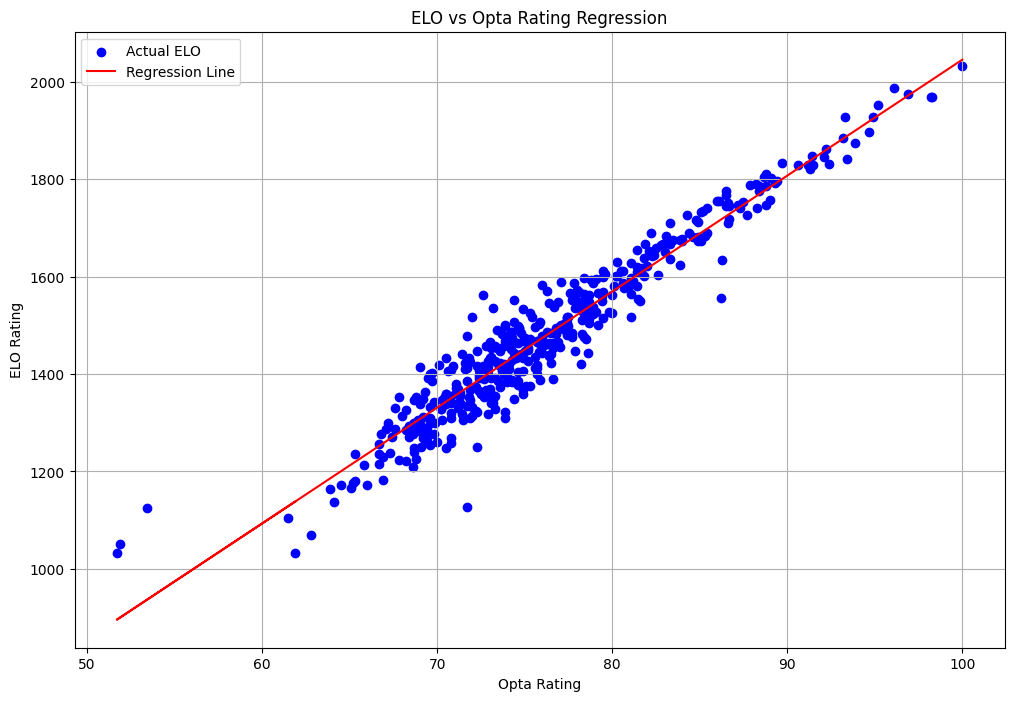

In [12]:
main_regression()

In [13]:
standings_df = build_historical_standings_table_after_at_most_n_rounds(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, update_fixtures=UPDATE_FIXTURES)
standings_df.head(HEAD_SIZE)

{'Arka Gdynia', 'Pogon Szczecin', 'Raków Częstochowa', 'Lechia Gdansk', 'Zaglebie Lubin', 'Wisla Plock', 'Motor Lublin', 'Cracovia Krakow', 'Widzew Łódź', 'Piast Gliwice', 'GKS Katowice', 'Radomiak Radom', 'Lech Poznan', 'Jagiellonia', 'Nieciecza', 'Legia Warszawa', 'Korona Kielce', 'Gornik Zabrze'}
dict_keys(['Jagiellonia', 'Raków Częstochowa', 'Lech Poznan', 'Legia Warszawa', 'Gornik Zabrze', 'Pogon Szczecin', 'Cracovia Krakow', 'Korona Kielce', 'Piast Gliwice', 'Radomiak Radom', 'Zaglebie Lubin', 'GKS Katowice', 'Wisla Plock', 'Widzew Łódź', 'Motor Lublin', 'Lechia Gdansk', 'Arka Gdynia', 'Nieciecza', 'Wisla Krakow', 'Polonia Warszawa', 'Miedz Legnica', 'Polonia Bytom', 'Pogoń Grod. Mazowiecki', 'Chrobry Głogów', 'Wieczysta Kraków', 'Pogoń Siedlce', 'Tychy 71', 'Górnik Łęczna', 'Odra Opole', 'Stal Rzeszów', 'Znicz Pruszków', nan, 'Unia Skierniewice', 'Olimpia Grudziądz', 'Chojniczanka Chojnice', 'Stal Stalowa Wola', 'Resovia Rzeszów', 'Świt Skolwin', 'Podbeskidzie', 'Podhale Nowy Ta

,Club,Elo,Points,Games played
1,Gornik Zabrze,1531.15,29,15
2,Jagiellonia,1547.82,27,14
3,Wisla Plock,1457.36,26,14
4,Raków Częstochowa,1569.24,23,14
5,Radomiak Radom,1433.55,22,15
6,Cracovia Krakow,1497.83,22,14
7,Zaglebie Lubin,1426.41,21,14
8,Lech Poznan,1538.30,21,14
9,Korona Kielce,1466.88,20,15
10,Arka Gdynia,1385.94,18,15


In [14]:
standings_df['Points'] = standings_df.apply(lambda x: x['Points']-5 if x['Club'] == 'Lechia Gdansk' else x['Points'], axis=1)
standings_df.head(HEAD_SIZE)

,Club,Elo,Points,Games played
1,Gornik Zabrze,1531.15,29,15
2,Jagiellonia,1547.82,27,14
3,Wisla Plock,1457.36,26,14
4,Raków Częstochowa,1569.24,23,14
5,Radomiak Radom,1433.55,22,15
6,Cracovia Krakow,1497.83,22,14
7,Zaglebie Lubin,1426.41,21,14
8,Lech Poznan,1538.30,21,14
9,Korona Kielce,1466.88,20,15
10,Arka Gdynia,1385.94,18,15


In [15]:
float(round(standings_df['Points'].sum() / standings_df['Games played'].sum(), 2))

1.35

In [16]:
sample_season = simulate_season_after_n_rounds(league_id=LEAGUE_ID, season=SEASON, standings_df=standings_df)
sample_season.head(HEAD_SIZE)

,Club,Points,Elo,Games played
3,Raków Częstochowa,70,1569.24,34
2,Wisla Plock,70,1457.36,34
7,Lech Poznan,57,1538.30,34
13,Pogon Szczecin,55,1481.16,34
5,Cracovia Krakow,51,1497.83,34
4,Radomiak Radom,51,1433.55,34
6,Zaglebie Lubin,49,1426.41,34
1,Jagiellonia,48,1547.82,34
8,Korona Kielce,48,1466.88,34
0,Gornik Zabrze,47,1531.15,34


In [17]:
float(round(sample_season['Points'].sum() / sample_season['Games played'].sum(), 2))

1.37

In [29]:
# top 1
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=1, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [01:14<00:00, 133.48it/s]

10000 simulations
1 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Jagiellonia,3498,3262,35.0,32.6,2.86,3.07
2,Gornik Zabrze,2667,2418,26.7,24.2,3.75,4.14
3,Raków Częstochowa,2333,2131,23.3,21.3,4.29,4.69
4,Lech Poznan,536,470,5.4,4.7,18.66,21.28
5,Wisla Plock,384,311,3.8,3.1,26.04,32.15
6,Cracovia Krakow,346,299,3.5,3.0,28.90,33.44
7,Legia Warszawa,95,76,1.0,0.8,105.26,131.58
8,Korona Kielce,46,34,0.5,0.3,217.39,294.12
9,Zaglebie Lubin,40,30,0.4,0.3,250.00,333.33
10,Radomiak Radom,32,25,0.3,0.2,312.50,400.00


In [30]:
# top 2
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=2, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [01:08<00:00, 145.69it/s]

10000 simulations
2 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Jagiellonia,5901,5622,59.0,56.2,1.69,1.78
2,Gornik Zabrze,5072,4765,50.7,47.6,1.97,2.10
3,Raków Częstochowa,4448,4160,44.5,41.6,2.25,2.40
4,Lech Poznan,1502,1340,15.0,13.4,6.66,7.46
5,Wisla Plock,1132,1007,11.3,10.1,8.83,9.93
6,Cracovia Krakow,1108,978,11.1,9.8,9.03,10.22
7,Legia Warszawa,316,256,3.2,2.6,31.65,39.06
8,Korona Kielce,177,153,1.8,1.5,56.50,65.36
9,Radomiak Radom,123,104,1.2,1.0,81.30,96.15
10,Zaglebie Lubin,114,96,1.1,1.0,87.72,104.17


In [31]:
# top 3
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=3, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [01:08<00:00, 146.07it/s]

10000 simulations
3 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Jagiellonia,7560,7340.0,75.6,73.4,1.32,1.36
2,Gornik Zabrze,6844,6582.0,68.4,65.8,1.46,1.52
3,Raków Częstochowa,6315,6034.0,63.1,60.3,1.58,1.66
4,Lech Poznan,2826,2556.0,28.3,25.6,3.54,3.91
5,Wisla Plock,2203,1990.0,22.0,19.9,4.54,5.03
6,Cracovia Krakow,2062,1852.0,20.6,18.5,4.85,5.40
7,Legia Warszawa,803,693.0,8.0,6.9,12.45,14.43
8,Korona Kielce,412,343.0,4.1,3.4,24.27,29.15
9,Radomiak Radom,328,267.0,3.3,2.7,30.49,37.45
10,Zaglebie Lubin,312,264.0,3.1,2.6,32.05,37.88


In [32]:
# top 4
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=4, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [01:11<00:00, 139.14it/s]

10000 simulations
4 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Jagiellonia,8557,8366,85.6,83.7,1.17,1.20
2,Gornik Zabrze,8100,7886,81.0,78.9,1.23,1.27
3,Raków Częstochowa,7694,7473,76.9,74.7,1.30,1.34
4,Lech Poznan,4274,4011,42.7,40.1,2.34,2.49
5,Wisla Plock,3437,3150,34.4,31.5,2.91,3.17
6,Cracovia Krakow,3337,3087,33.4,30.9,3.00,3.24
7,Legia Warszawa,1556,1381,15.6,13.8,6.43,7.24
8,Korona Kielce,921,795,9.2,8.0,10.86,12.58
9,Radomiak Radom,665,569,6.6,5.7,15.04,17.57
10,Zaglebie Lubin,634,548,6.3,5.5,15.77,18.25


In [33]:
# top 6
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=6, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [01:12<00:00, 137.07it/s]

10000 simulations
6 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Jagiellonia,9524,9434,95.2,94.3,1.05,1.06
2,Gornik Zabrze,9278,9175,92.8,91.8,1.08,1.09
3,Raków Częstochowa,9154,9031,91.5,90.3,1.09,1.11
4,Lech Poznan,6876,6612,68.8,66.1,1.45,1.51
5,Wisla Plock,6052,5762,60.5,57.6,1.65,1.74
6,Cracovia Krakow,6006,5741,60.1,57.4,1.67,1.74
7,Legia Warszawa,3700,3376,37.0,33.8,2.70,2.96
8,Korona Kielce,2364,2127,23.6,21.3,4.23,4.70
9,Radomiak Radom,2012,1805,20.1,18.0,4.97,5.54
10,Zaglebie Lubin,1854,1652,18.5,16.5,5.39,6.05


In [34]:
# bottom 3
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=3, reverse=True, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [01:09<00:00, 144.89it/s]

10000 simulations
3 winning places
Reverse: TRUE


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Nieciecza,7254,6996.0,72.5,70.0,1.38,1.43
2,Lechia Gdansk,5693,5404.0,56.9,54.0,1.76,1.85
3,Piast Gliwice,4882,4564.0,48.8,45.6,2.05,2.19
4,Widzew Łódź,2785,2527.0,27.8,25.3,3.59,3.96
5,Motor Lublin,2733,2450.0,27.3,24.5,3.66,4.08
6,Arka Gdynia,2669,2370.0,26.7,23.7,3.75,4.22
7,GKS Katowice,1803,1600.0,18.0,16.0,5.55,6.25
8,Pogon Szczecin,681,574.0,6.8,5.7,14.68,17.42
9,Zaglebie Lubin,487,416.0,4.9,4.2,20.53,24.04
10,Radomiak Radom,395,317.0,4.0,3.2,25.32,31.55


In [18]:
# bottom 1
results = run_multiple_sims(league_id=LEAGUE_ID, season=SEASON, country_code_elo=COUNTRY_CODE_ELO, country_code_api=COUNTRY_CODE_API, elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=1, reverse=True, stdev=STDEV, standings_df=standings_df, update_fixtures=UPDATE_FIXTURES)
results.head(HEAD_SIZE)

100%|██████████| 10000/10000 [01:16<00:00, 131.10it/s]

10000 simulations
1 winning places
Reverse: TRUE


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Nieciecza,3750,3470.0,37.5,34.7,2.67,2.88
2,Lechia Gdansk,2164,1938.0,21.6,19.4,4.62,5.16
3,Piast Gliwice,1738,1564.0,17.4,15.6,5.75,6.39
4,Motor Lublin,625,552.0,6.2,5.5,16.00,18.12
5,Widzew Łódź,563,462.0,5.6,4.6,17.76,21.65
6,Arka Gdynia,563,485.0,5.6,4.9,17.76,20.62
7,GKS Katowice,329,277.0,3.3,2.8,30.40,36.10
8,Pogon Szczecin,88,64.0,0.9,0.6,113.64,156.25
9,Zaglebie Lubin,59,47.0,0.6,0.5,169.49,212.77
10,Radomiak Radom,50,45.0,0.5,0.4,200.00,222.22
